In [13]:
import numpy as np
import pandas as pd
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt

In [15]:
def filter_coef(num_dados, grau):
    assert num_dados % 2 ==1
    M = (num_dados - 1)/2
    
    A = np.zeros((num_dados, grau))

    for n in range(A.shape[0]):
        for i in range(A.shape[1]):
            A[n, i] = (n-M)**i

    H = np.linalg.inv(A.transpose() @ A) @ A.transpose()

    h = H[0, :]
    return h


In [2]:
M = 21
N = 3
num_dados = 2*M + 1
grau = N + 1

A = np.zeros((num_dados, grau))

for n in range(A.shape[0]):
    for i in range(A.shape[1]):
        A[n, i] = (n-M)**i

#print(A)
H = np.linalg.inv(A.transpose() @ A) @ A.transpose()

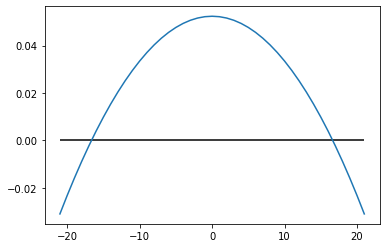

In [3]:
x = np.array([i for i in range(-M, M+1)])

plt.hlines(0,x.min(), x.max(), color="black")
plt.plot(x, H[0, :])

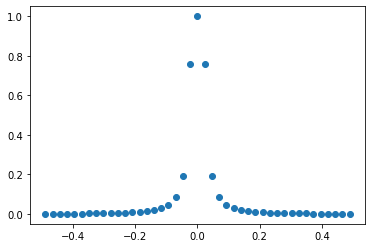

In [4]:
h = fftshift(fft(H[0, :]))
f = fftshift(fftfreq(h.shape[0]))
plt.scatter(f, np.abs(h))

In [5]:
69/(1/0.000195)

0.013455

# Frequency response

In [16]:
M = 16
N = 12

df = pd.DataFrame()
for N in range(0, M-1, 4):
    num_dados = 2*M + 1
    grau = N + 1

    h = filter_coef(num_dados=num_dados, grau=grau)
    res = np.convolve([int(i==0) for i in range(-200, 201)], h)

    h = fftshift(fft(res))
    f = fftshift(fftfreq(h.shape[0]))
    h_db = 10*np.log(np.abs(h))
    

    _df = pd.DataFrame({"freq": f*2,
                        "h_db": h_db})
    _df["N"] = N
    _df["M"] = M
    df = pd.concat([df, _df], ignore_index=True)

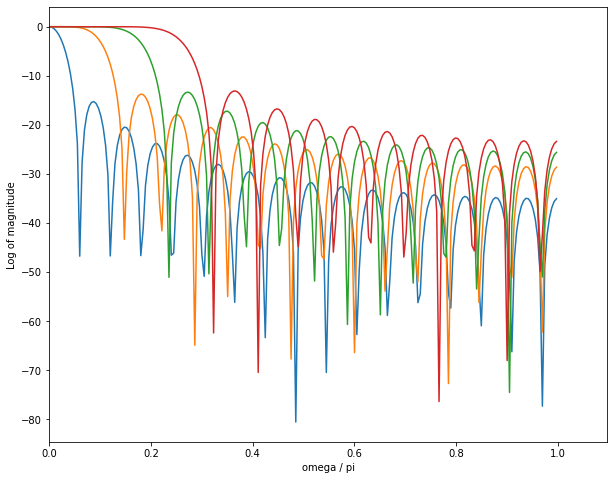

In [21]:
plt.figure(figsize=(10, 8))
for (N, M), group in df.groupby(["N", "M"]):
    plt.plot(group.freq, group.h_db, label = group.N)
    
plt.ylabel("Log of magnitude")
plt.xlabel("omega / pi")
plt.xlim(left=0)
plt.show()

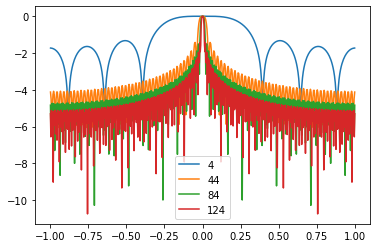

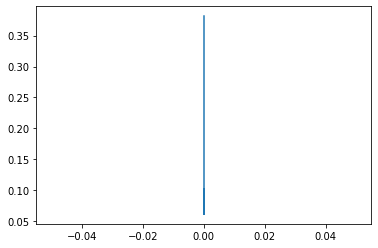

In [15]:
M = 125
N = 0

cutoff = []
Ns = []
for M in range(4, M, 40):
    num_dados = 2*M + 1
    grau = 3

    A = np.zeros((num_dados, grau))

    for n in range(A.shape[0]):
        for i in range(A.shape[1]):
            A[n, i] = (n-M)**i

    H = np.linalg.inv(A.transpose() @ A) @ A.transpose()

    h = H[0, :]

    res = np.convolve([int(i==0) for i in range(-200, 201)], h)

    h = fftshift(fft(res))
    f = fftshift(fftfreq(h.shape[0]))
    plt.plot(f*2, np.log(np.abs(h)), label=M)
    h = h[f >= 0]
    f = f[f >= 0]
    diff = np.abs(np.log(h) + 3)
    
    cutoff.append(2*f[np.argmin(diff)])
    Ns.append(N)

plt.legend()
plt.show()

plt.plot(Ns, cutoff)


In [104]:
69 / (1 / 0.000195) * 2

0.02691

In [71]:
h = H[0, :]

In [72]:
print(h[-1])
print(h[0])

-3.5746749599125745e-05
-0.031007751937984496


# Noise

In [64]:
1/35*np.array([-3, 12, 17, 12, -3])

array([-0.08571429,  0.34285714,  0.48571429,  0.34285714, -0.08571429])

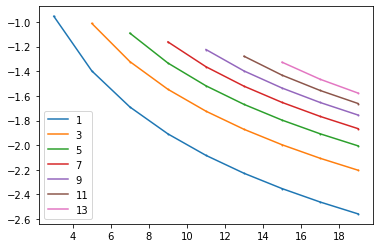

In [80]:
for grau in range(1,15, 2):
    factors = []
    Ns = []
    for i in range(grau+2, 20, 2):

        factor = np.square(filter_coef(num_dados=i,grau=grau)).mean()
        factors.append(factor)
        Ns.append(i)
    plt.plot(Ns, np.log10(factors), label=grau)    
    plt.scatter(Ns, np.log10(factors), s=1)

plt.legend()
plt.show()

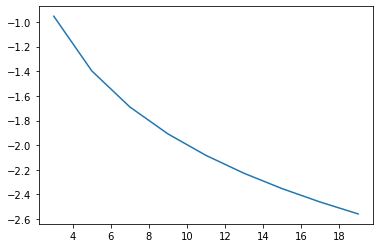

In [61]:
plt.plot(Ns, np.log10(factors)